In [1]:
import pandas as pd
import numpy as np

In [2]:
en_data = pd.read_table('../implementation/../NLP_HW1/hp_en.txt', header=None)
fa_data = pd.read_table('../implementation/../NLP_HW1/hp_fa.txt', header=None)

fa_data['clm1'] = fa_data[0]
fa_data = fa_data.drop(columns=0)

en_data['clm1'] = en_data[0]
en_data = en_data.drop(columns=0)

In [3]:
#removing emojis and enters
fa_data['clm1'] = fa_data['clm1'].str.replace('[\n]', ' ', regex=True)
fa_data['clm1'] = fa_data['clm1'].str.replace('[^a-zA-Z0-9\s|\u0600-\u06FF\s]', '', regex=True)
fa_data['clm1']

0       آقا و خانم دورسلي   ساکن خانه شماره چهار خيابا...
1       آقاي دورسلي مدير شرکت دريل سازي گرونينگز   ، م...
2       آنها خانواده ي مرفهي بودند و هيچ کم و کسري ندا...
3       خلاصه ، داستان ما از يک روز سه شنبه آغاز شد صب...
4       هيچ يک از آن ها جغد قهوه اي رنگي را که از مقاب...
                              ...                        
4478                                           هري گفت   
4479                                  حتماً خوش ميگذره   
4480     همه از خنده اي که بر لب هري آمد متعجب شده بود...
4481     آخه اونا نميدونن که توي تابستون اجازه نداريم ...
4482                                                     
Name: clm1, Length: 4483, dtype: object

In [4]:
import re
import string

def clean_fa_text(text):

    #removing english characters and signs
    text = ''.join([i for i in text if not ((65 <= ord(i) <91)
                                    or (97 <= ord(i) < 123)
                                    or (48 <= ord(i) < 58))])

    #removing nbsp
    text_list = []
    for char in text:
        if ord(char) == 160:
            text_list.append(' ')
            continue
        text_list.append(char)
    text = ''.join(text_list)

    # removing sign
    text = ''.join([i for i in text if ord(i) not in [33, 34, 35, 36, 37, 38,
                                                      39, 40, 41, 42, 43, 44,
                                                      45, 46, 47, 58, 59, 60,
                                                      61, 62, 63, 64, 91, 92,
                                                      93, 94, 95, 96, 123, 124,
                                                      125, 126, 1548, 1567]])
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

fa_data['clm1'] = fa_data['clm1'].apply(clean_fa_text)
fa_data

,clm1
0,آقا و خانم دورسلي ساکن خانه شماره چهار خيابا...
1,آقاي دورسلي مدير شرکت دريل سازي گرونينگز مر...
2,آنها خانواده ي مرفهي بودند و هيچ کم و کسري ندا...
3,خلاصه داستان ما از يک روز سه شنبه آغاز شد صبح...
4,هيچ يک از آن ها جغد قهوه اي رنگي را که از مقاب...
...,...
4478,هري گفت
4479,حتماً خوش ميگذره
4480,همه از خنده اي که بر لب هري آمد متعجب شده بود...
4481,آخه اونا نميدونن که توي تابستون اجازه نداريم ...


In [5]:
#text normalizing
from hazm import Normalizer

norm = Normalizer()
fa_data['clm1'] = fa_data['clm1'].apply(lambda x: norm.normalize(x))
fa_data

,clm1
0,آقا و خانم دورسلی ساکن خانه شماره چهار خیابان ...
1,آقای دورسلی مدیر شرکت دریل سازی گرونینگز مردی ...
2,آنها خانواده‌ی مرفهی بودند و هیچ کم و کسری ندا...
3,خلاصه داستان ما از یک روز سه‌شنبه آغاز شد صبح ...
4,هیچ‌یک از آن‌ها جغد قهوه‌ای رنگی را که از مقاب...
...,...
4478,هری گفت
4479,حتما خوش میگذره
4480,همه از خنده‌ای که بر لب هری آمد متعجب شده بودن...
4481,آخه اونا نمیدونن که توی تابستون اجازه نداریم ج...


In [6]:
# Tokenizing
import nltk

tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
fa_data['clm1'] = fa_data['clm1'].apply(lambda x: tokenizer.tokenize(x))
fa_data

,clm1
0,"[آقا, و, خانم, دورسلی, ساکن, خانه, شماره, چهار..."
1,"[آقای, دورسلی, مدیر, شرکت, دریل, سازی, گرونینگ..."
2,"[آنها, خانواده, ی, مرفهی, بودند, و, هیچ, کم, و..."
3,"[خلاصه, داستان, ما, از, یک, روز, سه, شنبه, آغا..."
4,"[هیچ, یک, از, آن, ها, جغد, قهوه, ای, رنگی, را,..."
...,...
4478,"[هری, گفت]"
4479,"[حتما, خوش, میگذره]"
4480,"[همه, از, خنده, ای, که, بر, لب, هری, آمد, متعج..."
4481,"[آخه, اونا, نمیدونن, که, توی, تابستون, اجازه, ..."


In [7]:
# stopwords removal
import hazm

def remove_fa_stopwords(text):
    stop_word_fa = hazm.stopwords_list()
    words = [word for word in text if word not in stop_word_fa]
    return words

fa_data['clm1'] = fa_data['clm1'].apply(lambda x: remove_fa_stopwords(x))
fa_data

,clm1
0,"[آقا, خانم, دورسلی, ساکن, خانه, شماره, خیابان,..."
1,"[دورسلی, مدیر, شرکت, دریل, گرونینگز, مردی, درش..."
2,"[خانواده, ی, مرفهی, کسری, نداشتند, خانواده, را..."
3,"[خلاصه, داستان, روز, شنبه, آغاز, صبح, روز, آقا..."
4,"[ها, جغد, قهوه, ای, رنگی, مقابل, پنجره, زد, ند..."
...,...
4478,[هری]
4479,"[حتما, خوش, میگذره]"
4480,"[خنده, ای, لب, هری, متعجب, هری, ادامه]"
4481,"[آخه, اونا, نمیدونن, توی, تابستون, اجازه, ندار..."


In [8]:
#romove empty rows
def remove_empty_rows(x):
    return x if len(x)>1 else np.NAN

fa_data['clm1'] = fa_data['clm1'].apply(lambda x: remove_empty_rows(x))
fa_data = fa_data.dropna()
fa_data

,clm1
0,"[آقا, خانم, دورسلی, ساکن, خانه, شماره, خیابان,..."
1,"[دورسلی, مدیر, شرکت, دریل, گرونینگز, مردی, درش..."
2,"[خانواده, ی, مرفهی, کسری, نداشتند, خانواده, را..."
3,"[خلاصه, داستان, روز, شنبه, آغاز, صبح, روز, آقا..."
4,"[ها, جغد, قهوه, ای, رنگی, مقابل, پنجره, زد, ند..."
...,...
4476,"[هرمیون, رفتار, زشت, زننده, ی, عمو, ورنون, متعجب]"
4477,"[امیدوارم, تابستون, بهت, خوش, بگذره]"
4479,"[حتما, خوش, میگذره]"
4480,"[خنده, ای, لب, هری, متعجب, هری, ادامه]"


In [9]:
# lemmatization

from hazm import Lemmatizer

def lemmatizer(text_list):
    lemm = Lemmatizer()
    words = [lemm.lemmatize(word) for word in text_list]
    return words


fa_data['clm1'] = fa_data['clm1'].apply(lambda x: lemmatizer(x))
fa_data

In [10]:
en_data['clm1']

0       . http://www.google.com CHAPTER ONE THE BOY WH...
1       Mr. and Mrs. Dursley, of number four (4), Priv...
2       Mr. Dursley was the director of a firm called ...
3       The Dursleys had everything they wanted, but t...
4       When Mr. and Mrs. Dursley woke up on the dull,...
                              ...                        
2957    Harry hung back for a last word with Ron and H...
2958                      See you over the summer, then. 
2959    Hope you have -- er -- a good holiday, said He...
2960    Oh, I will, said Harry, and they were surprise...
2961                                             THE END 
Name: clm1, Length: 2962, dtype: object

In [11]:
#remove web addresses, signs
#change to lowercase

import re
import string

def clean_fa_text(text):

    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)

    # removing sign
    text = ''.join([i for i in text if ord(i) not in [33, 34, 35, 36, 37, 38,
                                                      39, 40, 41, 42, 43, 44,
                                                      45, 46, 47, 58, 59, 60,
                                                      61, 62, 63, 64, 91, 92,
                                                      93, 94, 95, 96, 123, 124,
                                                      125, 126, 1548, 1567]])
    return text

en_data['clm1'] = en_data['clm1'].apply(clean_fa_text)
en_data

,clm1
0,chapter one the boy who lived
1,mr and mrs dursley of number four privet driv...
2,mr dursley was the director of a firm called g...
3,the dursleys had everything they wanted but th...
4,when mr and mrs dursley woke up on the dull gr...
...,...
2957,harry hung back for a last word with ron and h...
2958,see you over the summer then
2959,hope you have er a good holiday said hermion...
2960,oh i will said harry and they were surprised a...


In [12]:
#remove numbers and emojis
en_data['clm1'] = en_data['clm1'].str.replace('[\n]', ' ', regex=True)
en_data['clm1'] = en_data['clm1'].str.replace('[0-9|\u0600-\u06FF]', ' ', regex=True)
en_data['clm1']

0                          chapter one the boy who lived 
1       mr and mrs dursley of number four  privet driv...
2       mr dursley was the director of a firm called g...
3       the dursleys had everything they wanted but th...
4       when mr and mrs dursley woke up on the dull gr...
                              ...                        
2957    harry hung back for a last word with ron and h...
2958                        see you over the summer then 
2959    hope you have  er  a good holiday said hermion...
2960    oh i will said harry and they were surprised a...
2961                                             the end 
Name: clm1, Length: 2962, dtype: object

In [13]:
# Tokenizing
import nltk

tokenizer_en = nltk.tokenize.RegexpTokenizer(r'\w+')
en_data['clm1'] = en_data['clm1'].apply(lambda x: tokenizer_en.tokenize(x))
en_data

,clm1
0,"[chapter, one, the, boy, who, lived]"
1,"[mr, and, mrs, dursley, of, number, four, priv..."
2,"[mr, dursley, was, the, director, of, a, firm,..."
3,"[the, dursleys, had, everything, they, wanted,..."
4,"[when, mr, and, mrs, dursley, woke, up, on, th..."
...,...
2957,"[harry, hung, back, for, a, last, word, with, ..."
2958,"[see, you, over, the, summer, then]"
2959,"[hope, you, have, er, a, good, holiday, said, ..."
2960,"[oh, i, will, said, harry, and, they, were, su..."


In [14]:
# removing stop words in english

from nltk.corpus import stopwords
import hazm

def remove_en_stopwords(text):
    stop_word_en = list(set(stopwords.words('english')))
    words = [w for w in text if w not in stop_word_en]
    return words

en_data['clm1'] = en_data['clm1'].apply(lambda x: remove_en_stopwords(x))
en_data

,clm1
0,"[chapter, one, boy, lived]"
1,"[mr, mrs, dursley, number, four, privet, drive..."
2,"[mr, dursley, director, firm, called, grunning..."
3,"[dursleys, everything, wanted, also, secret, g..."
4,"[mr, mrs, dursley, woke, dull, gray, tuesday, ..."
...,...
2957,"[harry, hung, back, last, word, ron, hermione]"
2958,"[see, summer]"
2959,"[hope, er, good, holiday, said, hermione, look..."
2960,"[oh, said, harry, surprised, grin, spreading, ..."


In [15]:
#romove empty rows

en_data['clm1'] = en_data['clm1'].apply(lambda x: remove_empty_rows(x))
en_data = en_data.dropna()
en_data

,clm1
0,"[chapter, one, boy, lived]"
1,"[mr, mrs, dursley, number, four, privet, drive..."
2,"[mr, dursley, director, firm, called, grunning..."
3,"[dursleys, everything, wanted, also, secret, g..."
4,"[mr, mrs, dursley, woke, dull, gray, tuesday, ..."
...,...
2956,"[manner, speaking, said, uncle, vernon, hurry,..."
2957,"[harry, hung, back, last, word, ron, hermione]"
2958,"[see, summer]"
2959,"[hope, er, good, holiday, said, hermione, look..."


In [16]:
# combin tokens

def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

en_data['clm1'] = en_data['clm1'].apply(lambda x:combine_text(x))
en_data

C:\Users\pouri\AppData\Local\Temp\ipykernel_17996\1544932112.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_data['clm1'] = en_data['clm1'].apply(lambda x:combine_text(x))


,clm1
0,chapter one boy lived
1,mr mrs dursley number four privet drive proud ...
2,mr dursley director firm called grunnings made...
3,dursleys everything wanted also secret greates...
4,mr mrs dursley woke dull gray tuesday story st...
...,...
2956,manner speaking said uncle vernon hurry boy ha...
2957,harry hung back last word ron hermione
2958,see summer
2959,hope er good holiday said hermione looking unc...


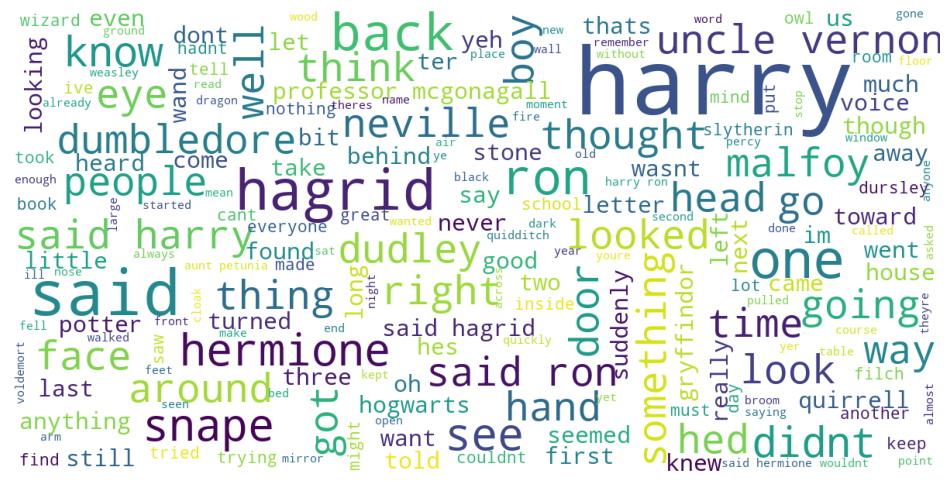

In [17]:
# show cloud of words

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def all_text(token_dataset: pd.DataFrame):
    text = ''
    for words in token_dataset['clm1']:
        text += words + ' '
    return text




def show_wordcloud(data, title = None):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


text = all_text(en_data)
show_wordcloud(text)